### Introduction

When you want to purchase a new Mobile Phone, will you walk up to the first Mobile Store and purchase one based on the advice of the dealer? It’s highly unlikely.

You would likely browser a few web portals where people have posted their reviews and compare different Mobile models, checking for their features and prices. You will also probably ask your friends and colleagues for their opinion. In short, you wouldn’t directly reach a to conclusion, but will instead make a decision considering the opinions of other people as well.

Ensemble models in machine learning operate on a similar idea. They combine the decisions from multiple models to improve the overall performance than could be obtained from any of the constituent learning models alone.

The three most popular methods for combining the predictions from different models are:
* Voting. Building multiple models (typically of differing types) and simple statistics (like calculating the mean) are used to combine predictions.
* Bagging. Building multiple models (typically of the same type) from different subsamples of the training dataset.
* Boosting. Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the chain.
    

### Voting

A voting ensemble works by combining the predictions from multiple models. It can be used for classification or regression. In this technique, multiple models are used to make predictions for each data point. The predictions by each model are considered as a `vote`. The predictions which we get from the `majority` of the models are used as the `final prediction`.

* Regression Voting Ensemble: Predictions are the average of contributing models.
* Classification Voting Ensemble: Predictions are the majority vote of contributing models.

#### Voting Ensemble for Classification

knn1 0.873 (0.030)
knn3 0.889 (0.038)
knn5 0.895 (0.031)
knn7 0.899 (0.035)
knn9 0.900 (0.033)
voting 0.902 (0.034)


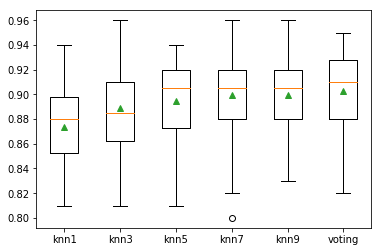

In [1]:
# compare hard voting to standalone classifiers
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot
%matplotlib inline
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)
    return X, y

# get a voting ensemble of models
def get_voting():
    # define the base models
    models = list()
    models.append(('knn1', KNeighborsClassifier(n_neighbors=1)))
    models.append(('knn3', KNeighborsClassifier(n_neighbors=3)))
    models.append(('knn5', KNeighborsClassifier(n_neighbors=5)))
    models.append(('knn7', KNeighborsClassifier(n_neighbors=7)))
    models.append(('knn9', KNeighborsClassifier(n_neighbors=9)))
    # define the voting ensemble
    ensemble = VotingClassifier(estimators=models)
    return ensemble

# get a list of models to evaluate
def get_models():
    models = dict()
    models['knn1'] = KNeighborsClassifier(n_neighbors=1)
    models['knn3'] = KNeighborsClassifier(n_neighbors=3)
    models['knn5'] = KNeighborsClassifier(n_neighbors=5)
    models['knn7'] = KNeighborsClassifier(n_neighbors=7)
    models['knn9'] = KNeighborsClassifier(n_neighbors=9)
    models['voting'] = get_voting()
    return models

# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#### Ensemble for Regression

cart1 -161.519 (11.414)
cart2 -152.596 (11.271)
cart3 -142.378 (10.900)
cart4 -140.086 (12.469)
cart5 -137.587 (11.960)
voting -136.393 (11.284)


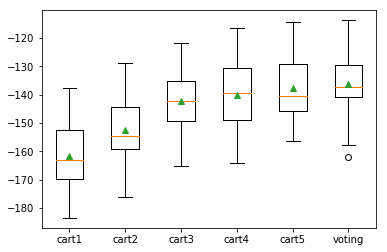

In [2]:
# compare voting ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from matplotlib import pyplot

# get the dataset
def get_dataset():
    X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
    return X, y

# get a voting ensemble of models
def get_voting():
    # define the base models
    models = list()
    models.append(('cart1', DecisionTreeRegressor(max_depth=1)))
    models.append(('cart2', DecisionTreeRegressor(max_depth=2)))
    models.append(('cart3', DecisionTreeRegressor(max_depth=3)))
    models.append(('cart4', DecisionTreeRegressor(max_depth=4)))
    models.append(('cart5', DecisionTreeRegressor(max_depth=5)))
    # define the voting ensemble
    ensemble = VotingRegressor(estimators=models)
    return ensemble

# get a list of models to evaluate
def get_models():
    models = dict()
    models['cart1'] = DecisionTreeRegressor(max_depth=1)
    models['cart2'] = DecisionTreeRegressor(max_depth=2)
    models['cart3'] = DecisionTreeRegressor(max_depth=3)
    models['cart4'] = DecisionTreeRegressor(max_depth=4)
    models['cart5'] = DecisionTreeRegressor(max_depth=5)
    models['voting'] = get_voting()
    return models

# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### Bagging

Bagging performs best with algorithms that have high variance. Random forest is an extension of bagged decision trees.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Importing dataset
df=pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Data Preprocessing

In [8]:
# Data Preprocessing and null values imputation
# Label Encoding
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df['Married']=df['Married'].map({'Yes':1,'No':0})
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Dependents'].replace('3+',3,inplace=True)
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})
df['Property_Area']=df['Property_Area'].map({'Semiurban':1,'Urban':2,'Rural':3})
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})

#Null Value Imputation
rev_null=['Gender','Married','Dependents','Self_Employed','Credit_History','LoanAmount','Loan_Amount_Term']
df[rev_null]=df[rev_null].replace({np.nan:df['Gender'].mode(),
                                   np.nan:df['Married'].mode(),
                                   np.nan:df['Dependents'].mode(),
                                   np.nan:df['Self_Employed'].mode(),
                                   np.nan:df['Credit_History'].mode(),
                                   np.nan:df['LoanAmount'].mean(),
np.nan:df['Loan_Amount_Term'].mean()})

#### Creating Train and Test Sets

In [9]:
X=df.drop(columns=['Loan_ID','Loan_Status']).values
Y=df['Loan_Status'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [10]:
print('Shape of X_train: ',X_train.shape)
print('Shape of X_test : ',X_test.shape)
print('Shape of Y_train: ',Y_train.shape)
print('Shape of Y_test : ',Y_test.shape)

Shape of X_train:  (491, 11)
Shape of X_test :  (123, 11)
Shape of Y_train:  (491,)
Shape of Y_test :  (123,)


#### Building and Evaluating the Model

In [11]:
# Building Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt.fit(X_train, Y_train)
dt_pred_train = dt.predict(X_train)

In [13]:
dt_pred_train = dt.predict(X_train)
print('Training Set Evaluation F1-Score: ',f1_score(Y_train,dt_pred_train))

Training Set Evaluation F1-Score:  1.0


In [14]:
# Evaluating on Test set
dt_pred_test = dt.predict(X_test)
print('Testing Set Evaluation F1-Score: ',np.round(f1_score(Y_test,dt_pred_test),3))

Testing Set Evaluation F1-Score:  0.795


#### What we can infer from the above to scores?

Model is overfitting

#### Building a Random Forest Model

The Random Forest Algorithm combines the output of multiple (randomly created) Decision Trees to generate the final output.

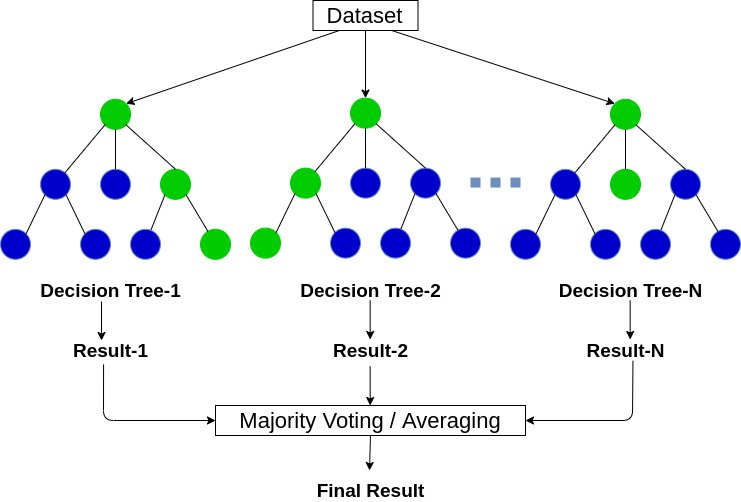

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train, Y_train)

# Evaluating on Training set
rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation F1-Score: ',f1_score(Y_train,rfc_pred_train))

Training Set Evaluation F1-Score:  1.0


In [17]:
# Evaluating on Test set
rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation F1-Score: ',np.round(f1_score(Y_test,rfc_pred_test),3))

Testing Set Evaluation F1-Score:  0.846


#### Why Random Forest Model Outperform than Decision Tree?

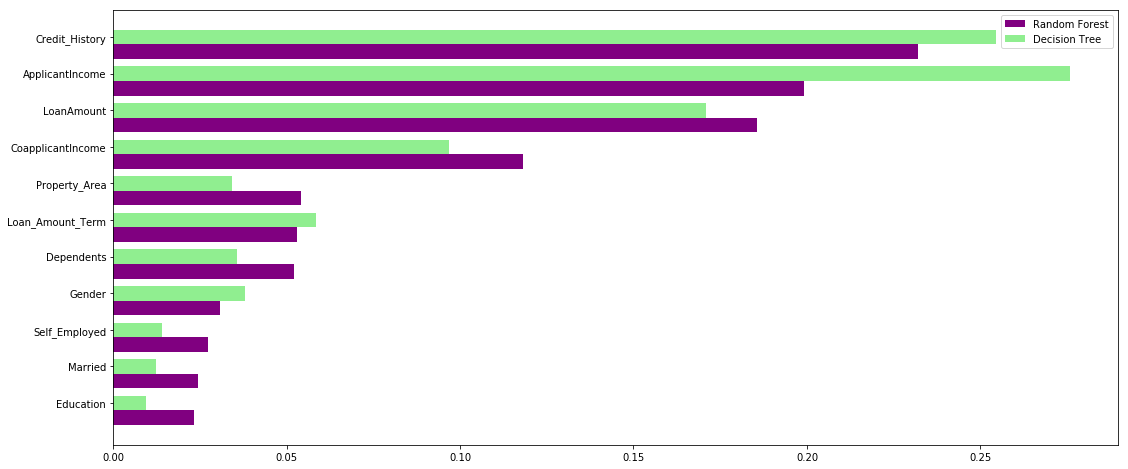

In [19]:
feature_importance=pd.DataFrame({
    'rfc':rfc.feature_importances_,
    'dt':dt.feature_importances_
},index=df.drop(columns=['Loan_ID','Loan_Status']).columns)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

The decision tree model gives high importance to a particular set of features. But the random forest chooses features randomly during the training process. Therefore, it does not depend highly on any specific set of features.

Therefore, the random forest can `generalize over the data` in a better way. This `randomized feature selection`makes random forest much more accurate than a decision tree.

### Boosting

Boosting is a sequential process, where each subsequent model attempts to correct the errors of the previous model. The succeeding models are dependent on the previous model.

#### Boosting has following steps:
    1. A subset is created from the original dataset.
    2. Initially, all data points are given equal weights.
    3. A base model is created on this subset.
    4. This model is used to make predictions on the whole dataset.

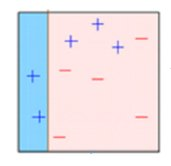

5. Errors are calculated using the actual values and predicted values.
6. The observations which are incorrectly predicted, are given higher weights.
(Here, the three misclassified blue-plus points will be given higher weights)
7. Another model is created and predictions are made on the dataset.
(This model tries to correct the errors from the previous model)

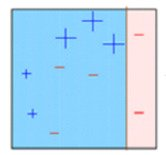

8. Similarly, multiple models are created, each one tries to correct the errors of its previous model.
9. The final model (strong learner) is the weighted mean of all the models (weak learners).

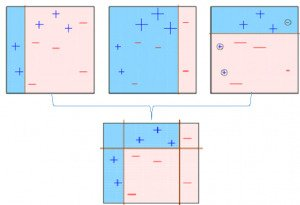

Thus, the boosting algorithm combines a number of weak learners to form a strong learner. The individual models would not perform well on the entire dataset, but they work well for some part of the dataset. Thus, each model actually boosts the performance of the ensemble.

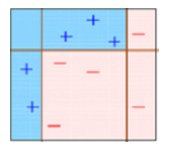

In [20]:
import xgboost as xgb
model=xgb.XGBClassifier(learning_rate=0.01,random_state=1)
model.fit(X_train, Y_train)
model.score(X_test,Y_test)

0.7886178861788617

### Challange-1

Read the dataset named `Churn_Prediction.csv`

Explore the loaded dataset

Drop columns that are not required for classification of Churn Risk

Perform imputation on the categorical columns by frequent value

Perform on-hot-encoding

define a pipeline to impuation and one-hot-encoding

Do scaling on numerical columns

Combine both numerical columns and categorical columns into a dataframe

Divide the feature vector and label vector from the above dataframe.

Note: feature vector is all the columns except Churn Risk and label vector conatins only Churn Risk column

Do label encoding on the lable column

Split data into test and train(20:80)

Build K-Nearest classification model

Print the accuracy score and display the confusion matrix on the test data

Build Decison Tree classification Model

Print the accuracy score and display the confusion matrix on the test data

Build voting classifier Model

Print the accuracy score and display the confusion matrix on the test data

Build Random Forest classification model

Print the accuracy score and display the confusion matrix on the test data

Build XGB Classifier model

Print the accuracy score and display the confusion matrix on the test data

Build Voting with XGB and RandomForest

Print the accuracy score and display the confusion matrix on the test data

Write down your inferences from your outputs.